<a href="https://colab.research.google.com/github/Vikram110/AWP-waterfoundation/blob/master/Irisproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
%matplotlib inline
import missingno as msno
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings

In [ ]:
df = pd.read_csv("iris.csv")

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



#  EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [ ]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df["species"]=l.fit_transform(df["species"])

In [ ]:
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


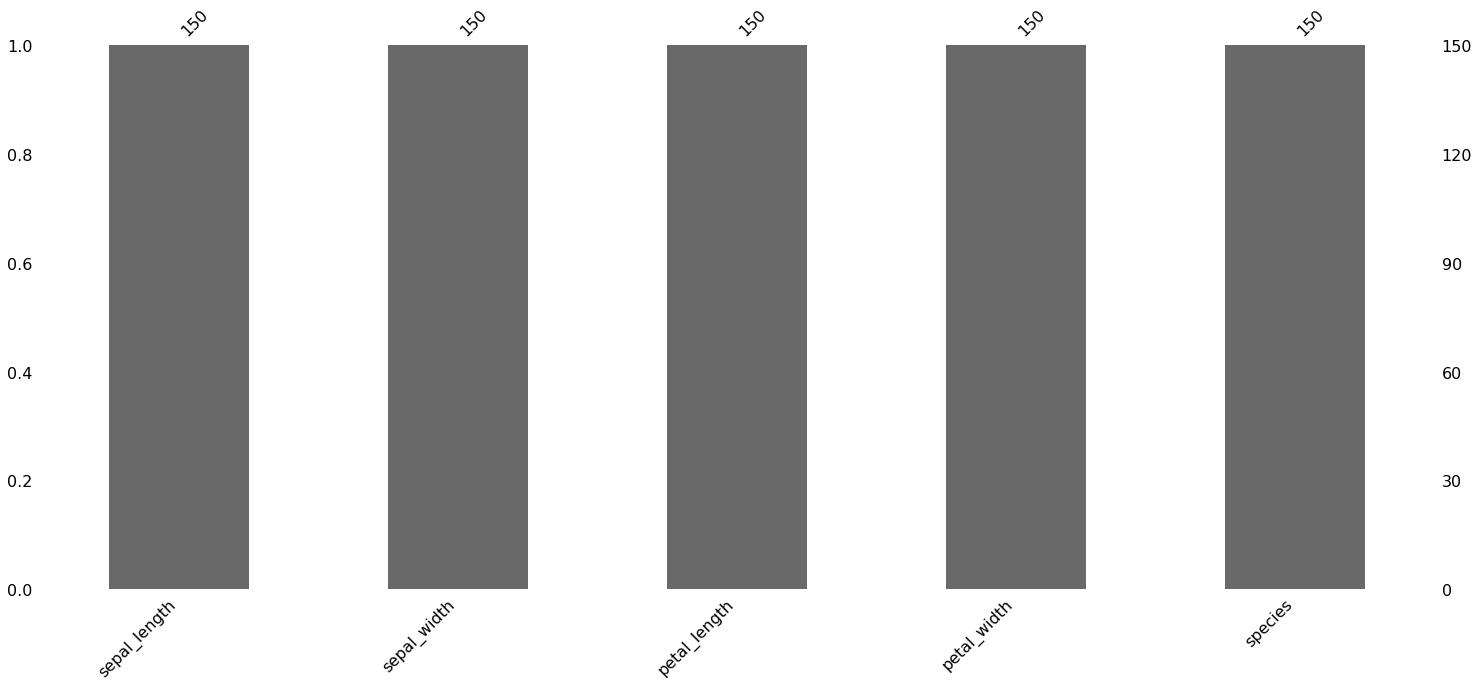

In [ ]:
p=msno.bar(df)

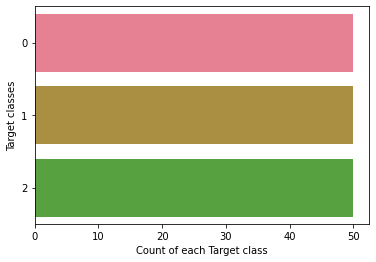

In [ ]:
sns.countplot(y=df.species ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()


1. 150 rows
2. 4 Independent variables to act as factors
3. All have same units of measurement (cm)
4. No missing data
5. Three unique target classes namely : 'Iris-setosa',     'Iris-versicolor' and 'Iris-virginica'
6. No class imbalance, all target classes have equal number of rows (50 each).

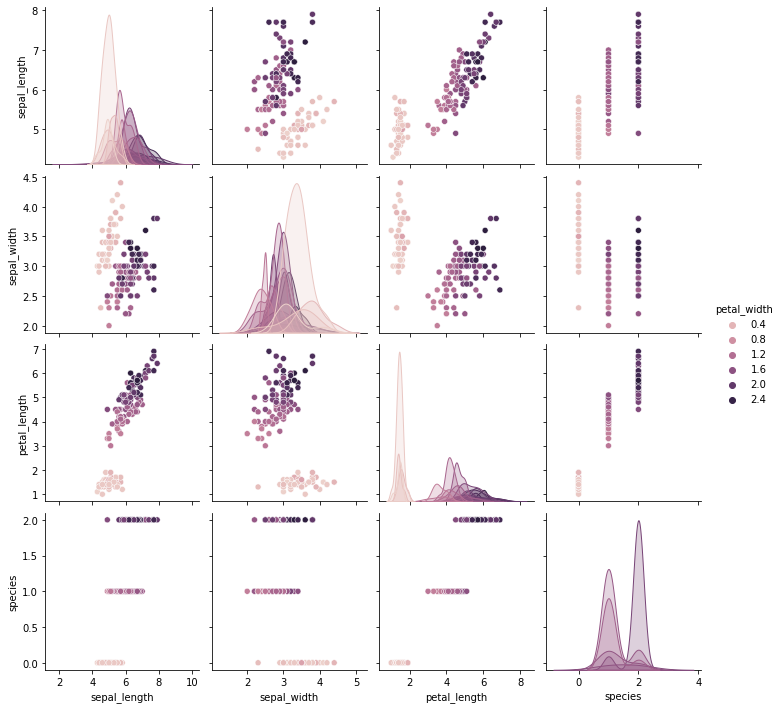

In [ ]:
sns.pairplot(df,hue="petal_width")

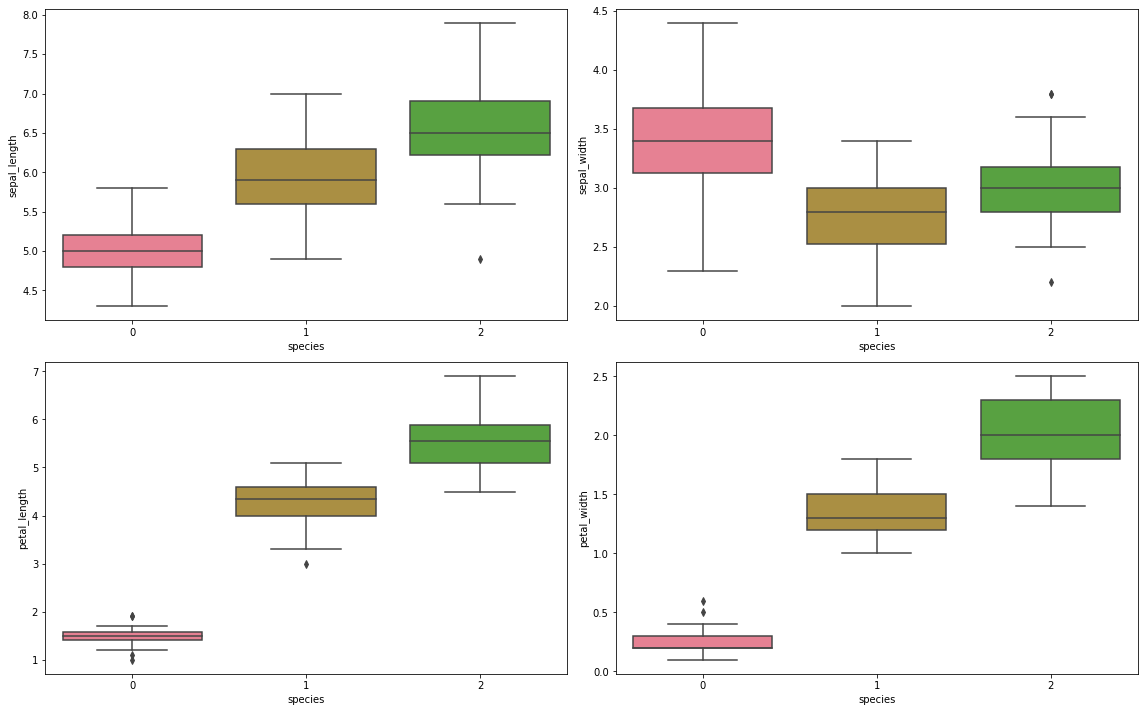

In [ ]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['species'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

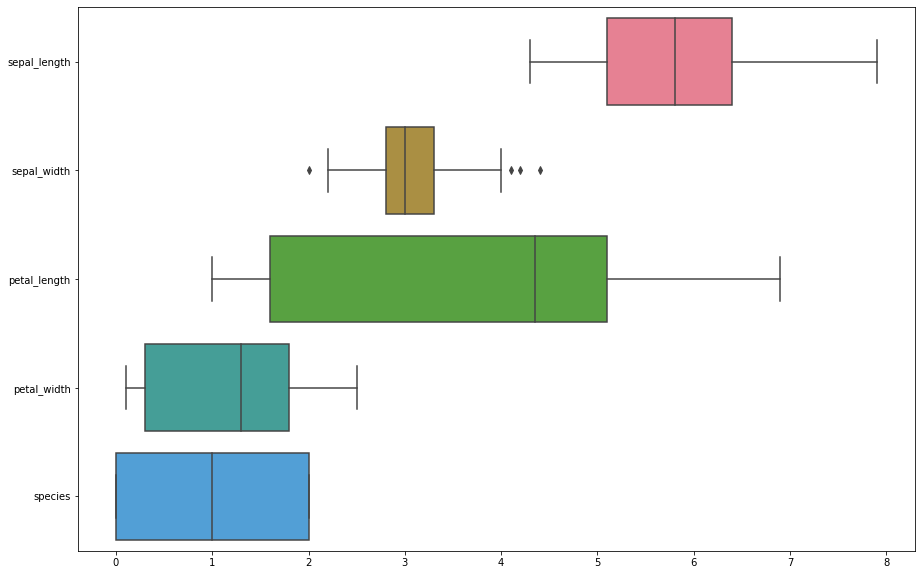

In [ ]:
plt.subplots(figsize=(15,10))

sns.boxplot(data=df,orient="h")
plt.show()

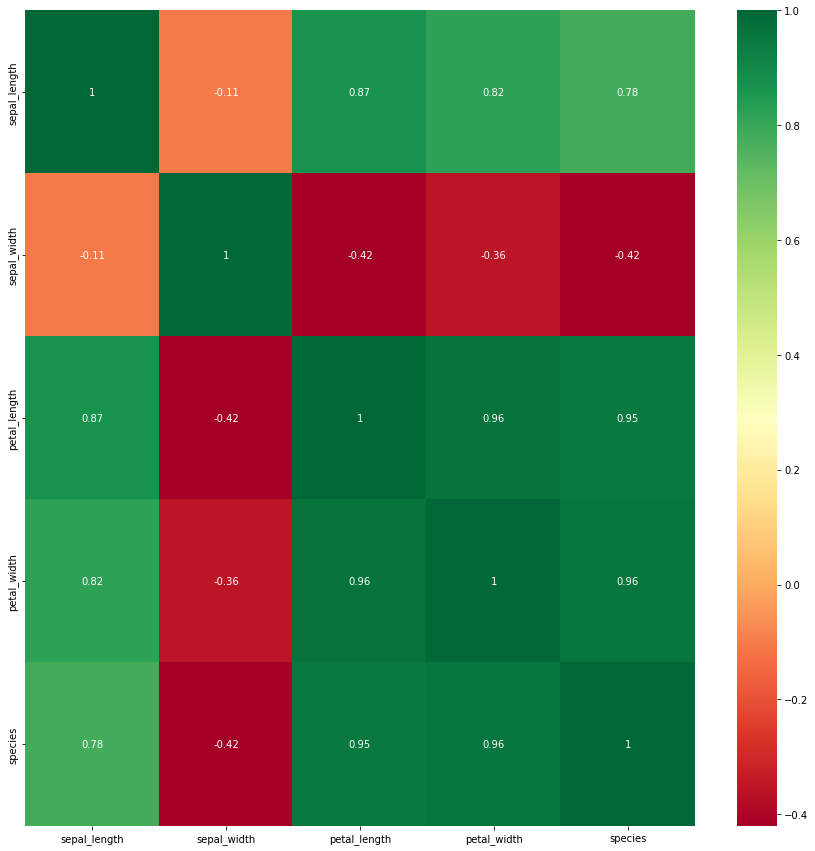

In [ ]:
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn') 

One of the biggest aims of these sort of plots and EDAs are to identify features that are not much helpful in explaining the target outcome. The SepalWidthCm feature seems to be less relevant in explaining the target class as compared to the other features

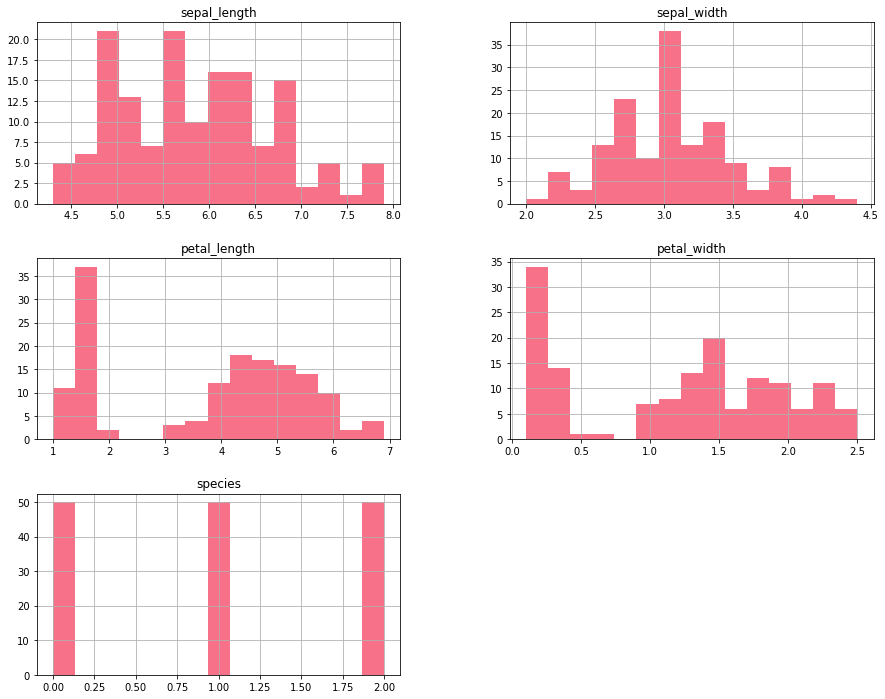

In [ ]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

Define the target variable (y) and feature set (X)

In [ ]:
X = df.iloc[:, 1:5]
X

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [ ]:
y = df.iloc[:, 5:6]
y

""
0
1
2
3
4
...
145
146
147
148


Split the dataset into a training set and a testing set

Pros

By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
This ensures that we won't use the same observations in both sets.


Cons

The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter). This means that accuracy scores can be different depending on what samples are in the training vs. testing dataset.
This disadvantage can be countered using k-fold cross-validation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print('Training Data')
print('Training feature set shape: ',(X_train.shape))
print('Training target shape: ',(y_train.shape))
print('Testing Data')
print('Testing feature shape: ',(X_test.shape))
print('Testing target shape: ',(y_test.shape))

Training Data
Training feature set shape:  (90, 4)
Training target shape:  (90, 0)
Testing Data
Testing feature shape:  (60, 4)
Testing target shape:  (60, 0)


# Principal Components Analysis

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [ ]:
pca.get_covariance()

array([[ 0.03263959, -0.02271983, -0.02048285, -0.03104027],
       [-0.02271983,  0.08943348,  0.09155279,  0.11625526],
       [-0.02048285,  0.09155279,  0.1011136 ,  0.12458054],
       [-0.03104027,  0.11625526,  0.12458054,  0.16778523]])

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.90530829, 0.06946253, 0.01709991, 0.00812928])

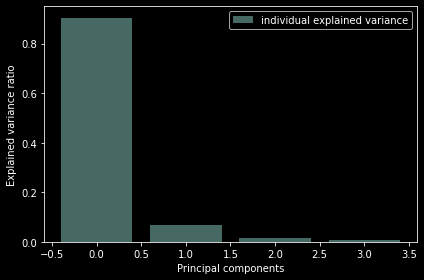

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
X = df.drop(['species'],axis=1)
y = df.species

In [ ]:
covM = X.cov()
eigenvalues, eigenvectors = np.linalg.eig(covM)

print(eigenvalues)
print(eigenvectors)

[4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [ ]:
featureVector = eigenvectors[:,:2]
new2d = X.dot(featureVector)
new2d.head(3)

,0,1
0,2.827136,-5.641331
1,2.795952,-5.145167
2,2.621524,-5.177378


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


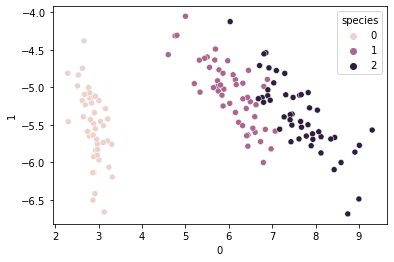

In [ ]:
import seaborn as sns
sns.scatterplot(new2d[0], new2d[1], hue=y);


In [ ]:
featureVector = eigenvectors[:,:3]
new3d = X.dot(featureVector)
new3d.head(3)

,0,1,2
0,2.827136,-5.641331,-0.664277
1,2.795952,-5.145167,-0.846287
2,2.621524,-5.177378,-0.618056


<ipython-input-40-80263216f309>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


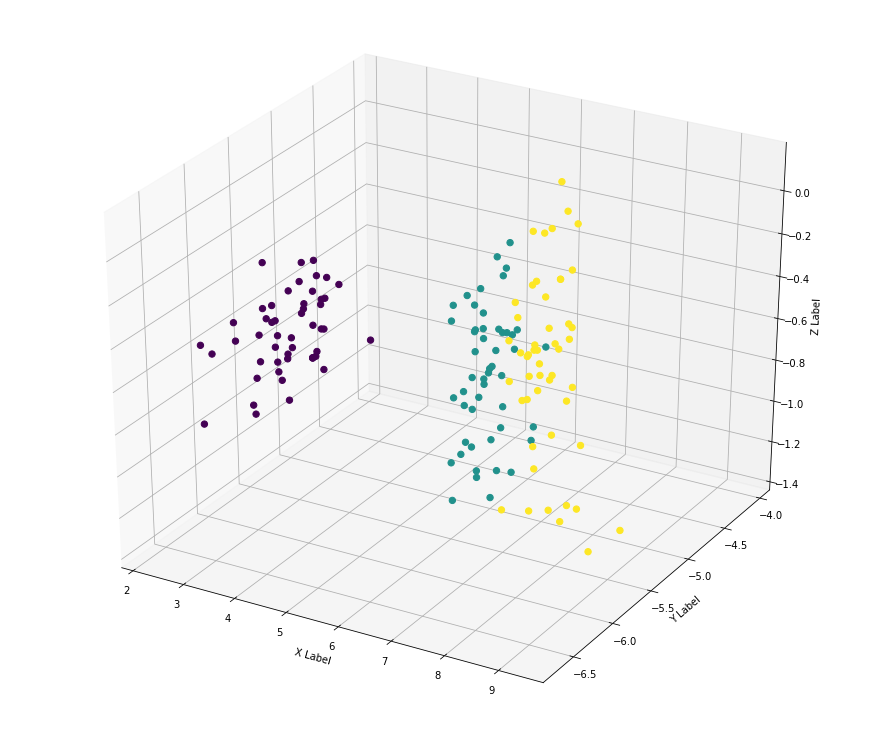

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib

n = 150

fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(new3d[0], new3d[1], new3d[2], s=40,c=y, marker='o',cmap=matplotlib.cm.get_cmap('viridis'),  alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {round(accuracy_score(y_test, preds), 2)}')
print()
print(confusion_matrix(y_test, preds))

# hyperparameter tuning

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

minmax=MinMaxScaler()
X=minmax.fit_transform(df.drop('species',axis=1))
Y=df.species

x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.2)

In [ ]:
para={'C':[10,0.2,0.01,0.5],'kernel':['linear','rbf']}
grid=GridSearchCV(SVC(),para,cv=10)
grid.fit(x_train,y_train)
print(f'Score on train data= {grid.score(x_train,y_train)} \n')
print(f'Score on test data={grid.score(x_test,y_test)}\n')
print(f'best param= {grid.best_params_}')


Score on train data= 0.9666666666666667 

Score on test data=0.9333333333333333

best param= {'C': 0.5, 'kernel': 'rbf'}


Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



[Text(0.5, 1.0, 'Confusion matrix on test set')]

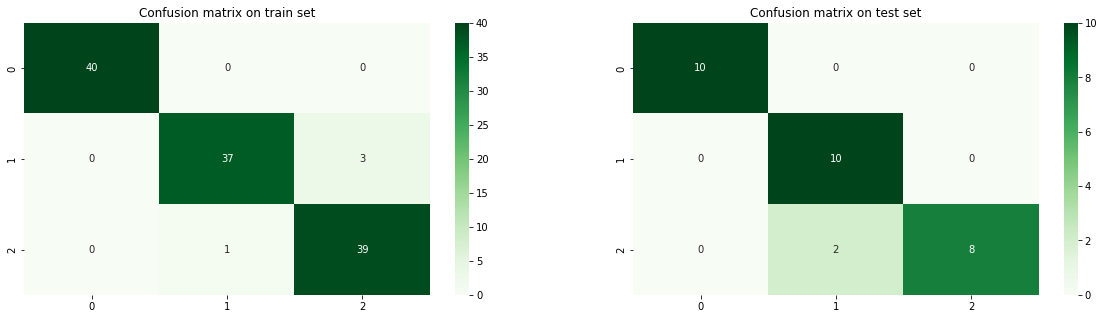

In [ ]:
y_pred=grid.predict(x_test)
y_train_pred=grid.predict(x_train)

print('Classification report \n',classification_report(y_test,y_pred))

fig,axes=plt.subplots(1,2,figsize=(20,5))

sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,cmap='Greens',ax=axes[0]).set(title='Confusion matrix on train set')

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Greens',ax=axes[1]).set(title='Confusion matrix on test set')

In [ ]:
param2={'n_neighbors':range(3,21,2),'metric':['euclidean','manhattan','minkowski']}
grid2=GridSearchCV(KNeighborsClassifier(),param2,cv=10)
grid2.fit(x_train,y_train)
print(f'Train score = {grid2.score(x_train,y_train)}')
print(f'Test Score = {grid2.score(x_test,y_test)}')
print(f'{grid2.best_params_}')

Train score = 0.9666666666666667
Test Score = 0.9333333333333333
{'metric': 'euclidean', 'n_neighbors': 15}


Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



[Text(0.5, 1.0, 'Confusion matrix on test set')]

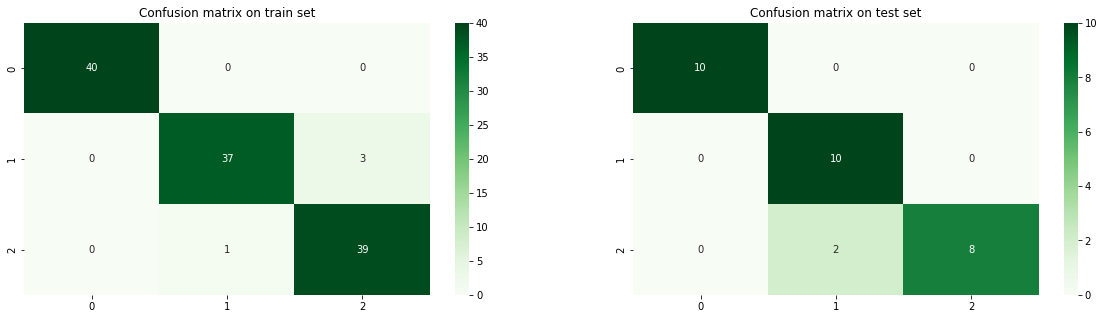

In [ ]:
y_pred=grid2.predict(x_test)
y_train_pred=grid2.predict(x_train)

print('Classification report \n',classification_report(y_test,y_pred))

fig,axes=plt.subplots(1,2,figsize=(20,5))

sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,cmap='Greens',ax=axes[0]).set(title='Confusion matrix on train set')

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Greens',ax=axes[1]).set(title='Confusion matrix on test set')